# 📝 Crime Data Analysis

In [413]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

# ✅ Q1 – Annual Crime Trends (2001–2013)

Question:
- Compute the total number of victims per year and analyze any patterns or fluctuations in crime rates over the years (2001–2012).

Files of Use:
- 01_District_wise_crimes_committed_IPC_2001_2012.csv
- 01_District_wise_crimes_committed_IPC_2013.csv

Useful Columns
- STATE/UT
- YEAR
- TOTAL IPC CRIMES

## 🔹 Step 1: Loading the dataset for the years 2001 to 2013

In [414]:
# Load the main IPC crimes file (2001–2012)
ipc_df_2012 = pd.read_csv(r"E:\0. VS Code\PrepGrad Minor project csvs\01_District_wise_crimes_committed_IPC_2001_2012.csv")
ipc_df_2013 = pd.read_csv(r"E:\0. VS Code\PrepGrad Minor project csvs\01_District_wise_crimes_committed_IPC_2013.csv")

# Merge the two dataframes
ipc_df = pd.concat([ipc_df_2012, ipc_df_2013], ignore_index=True)

# Save the merged dataframe to a CSV file
ipc_df.to_csv(r"E:\0. VS Code\PrepGrad Minor project csvs\01_District_wise_crimes_committed_IPC_2001_2013.csv", index=False)

# Display the first few rows of the dataframe
ipc_df.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507


## 🔹 Step 2: Clean Column Names

In [415]:
# Normalize column names: remove whitespace, lowercase, and replace spaces
ipc_df.columns = ipc_df.columns.str.strip().str.upper().str.replace(' ', '_')

In [416]:
# Check unique values in the 'STATE_UT' column
ipc_df['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI UT', 'LAKSHADWEEP', 'PUDUCHERRY',
       'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal', 'A&N Islands', 'Chandigarh', 'D&N Haveli',
     

In [417]:
# Clean STATE/UT names
ipc_df['STATE/UT'] = ipc_df['STATE/UT'].str.upper().str.strip()

# Unify common variations manually
ipc_df['STATE/UT'] = ipc_df['STATE/UT'].replace({
    'ANDHRA PRADESH': 'Andhra Pradesh',
    'ARUNACHAL PRADESH': 'Arunachal Pradesh',
    'ASSAM': 'Assam',
    'BIHAR': 'Bihar',
    'CHHATTISGARH': 'Chhattisgarh',
    'GOA': 'Goa',
    'GUJARAT': 'Gujarat',
    'HARYANA': 'Haryana',
    'HIMACHAL PRADESH': 'Himachal Pradesh',
    'JAMMU & KASHMIR': 'Jammu & Kashmir',
    'JHARKHAND': 'Jharkhand',
    'KARNATAKA': 'Karnataka',
    'KERALA': 'Kerala',
    'MADHYA PRADESH': 'Madhya Pradesh',
    'MAHARASHTRA': 'Maharashtra',
    'MANIPUR': 'Manipur',
    'MEGHALAYA': 'Meghalaya',
    'MIZORAM': 'Mizoram',
    'NAGALAND': 'Nagaland',
    'ODISHA': 'Odisha',
    'PUNJAB': 'Punjab',
    'RAJASTHAN': 'Rajasthan',
    'SIKKIM': 'Sikkim',
    'TAMIL NADU': 'Tamil Nadu',
    'TRIPURA': 'Tripura',
    'UTTAR PRADESH': 'Uttar Pradesh',
    'UTTARAKHAND': 'Uttarakhand',
    'WEST BENGAL': 'West Bengal',
    'A & N ISLANDS': 'Andaman & Nicobar Islands',
    'A&N ISLANDS': 'Andaman & Nicobar Islands',
    'CHANDIGARH': 'Chandigarh',
    'D & N HAVELI': 'Daman & Diu',
    'D&N Haveli': 'Daman & Diu',
    'DAMAN & DIU': 'Daman & Diu',
    'DELHI UT': 'Delhi',
    'LAKSHADWEEP': 'Lakshadweep',
    'PUDUCHERRY': 'Puducherry'
})


In [418]:
# Check unique values in the 'DISTRICT' column
ipc_df['DISTRICT'].unique()

array(['ADILABAD', 'ANANTAPUR', 'CHITTOOR', 'CUDDAPAH', 'EAST GODAVARI',
       'GUNTAKAL RLY.', 'GUNTUR', 'HYDERABAD CITY', 'KARIMNAGAR',
       'KHAMMAM', 'KRISHNA', 'KURNOOL', 'MAHABOOBNAGAR', 'MEDAK',
       'NALGONDA', 'NELLORE', 'NIZAMABAD', 'PRAKASHAM', 'RANGA REDDY',
       'SECUNDERABAD RLY.', 'SRIKAKULAM', 'VIJAYAWADA', 'VIJAYAWADA RLY.',
       'VISAKHA RURAL', 'VISAKHAPATNAM', 'VIZIANAGARAM', 'WARANGAL',
       'WEST GODAVARI', 'TOTAL', 'CHANGLANG', 'DIBANG VALLEY',
       'KAMENG EAST', 'KAMENG WEST', 'LOHIT', 'PAPUM PARE', 'SIANG EAST',
       'SIANG UPPER', 'SIANG WEST', 'SUBANSIRI LOWER', 'SUBANSIRI UPPER',
       'TAWANG', 'TIRAP', 'BARPETA', 'BONGAIGAON', 'C.I.D.', 'CACHAR',
       'DARRANG', 'DHEMAJI', 'DHUBRI', 'DIBRUGARH', 'G.R.P.', 'GOALPARA',
       'GOLAGHAT', 'GUWAHATI CITY', 'HAILAKANDI', 'JORHAT', 'KAMRUP',
       'KARBI ANGLONG', 'KARIMGANJ', 'KOKRAJHAR', 'LAKHIMPUR', 'MORIGAON',
       'N.C.HILLS', 'NAGAON', 'NALBARI', 'R.P.O.', 'SIBSAGAR', 'SONITPUR',
    

In [419]:
import difflib

# Clean DISTRICT names
ipc_df['DISTRICT'] = ipc_df['DISTRICT'].astype(str).str.strip().str.upper()

# Known alias mapping
alias_map = {
    "IMPHAL(WEST)": "IMPHAL WEST",
    "IMPHAL(EAST)": "IMPHAL EAST",
    "VIJAYAWADA CITY": "VIJAYAWADA",
    "VILUPPURAM": "VILLUPURAM",
    "KANSHIRAM NAGAR": "KASGANJ",
    "SAS NGR": "SHAHEED BHAGAT SINGH NAGAR",
    "SBS NAGAR": "SHAHEED BHAGAT SINGH NAGAR",
    "CHENNAISUBURBAN": "CHENNAI SUBURBAN",
    "JAIPUR EAST": "JAIPUR",
    "JAIPUR SOUTH": "JAIPUR",
    "JODHPUR CITY": "JODHPUR",
    "JODHPUR RURAL": "JODHPUR",
    "LUDHIANA RURAL": "LUDHIANA",
    "KOTA CITY": "KOTA",
    "KOTA RURAL": "KOTA",
    "G.R.P.": "GRP",
    "GRP": "RAILWAYS",
    "C.I.D.": "CID",
    "CID": "CID",
    "CBCID": "CID",
    "DCP BBSR": "BHUBANESWAR",
    "DCP CTC": "CUTTACK",
    "K/KUMEY": "KURUNG KUMEY"
}

# Standard district list (shortened for example, insert full cleaned list here)
standard_districts = [
"ADILABAD", "AGRA", "AHMEDABAD", "AIZAWL", "AJMER", "AKOLA", "ALIGARH", "ALMORA", "ALWAR", "AMBALA", "AMBEDKAR NAGAR", "AMRAVATI", "AMRELI", "AMRITSAR", "ANAND", "ANANTAPUR", "ANANTNAG", "ANGUL", "ANUPPUR", "ARARIA", "ARWAL", "ASHOKNAGAR", "AURAIYA", "AURANGABAD", "AZAMGARH", "BAGALKOT", "BAGESHWAR", "BALESHWAR", "BALLIA", "BALOD", "BALODABAZAR", "BALRAMPUR", "BANASKANTHA", "BANDA", "BANDIPORA", "BANGALORE", "BANGALORE RURAL", "BANKA", "BANKURA", "BANSWARA", "BARABANKI", "BARAMULLA", "BARAN", "BARDHAMAN", "BAREILLY", "BARGARH", "BARWANI", "BASTI", "BATHINDA", "BEGUSARAI", "BELAGAVI", "BELGAUM", "BEMETARA", "BENIPUR", "BERHAMPUR", "BETUL", "BHADOHI", "BHAGALPUR", "BHANDARA", "BHARATPUR", "BHARUCH", "BHAVNAGAR", "BHIWANI", "BHILWARA", "BHIND", "BHIWANI", "BHOJPUR", "BHOPAL", "BIDAR", "BIHAR SHARIF", "BIJAPUR", "BIJNOR", "BIKANER", "BILASPUR", "BIRBHUM", "BISHNUPUR", "BOKARO", "BUDAUN", "BULANDSHAHR", "BUNDI", "BURHANPUR", "BUXAR", "CHAMARAJANAGAR", "CHAMBAL", "CHAMPHAI", "CHANDAULI", "CHANDIGARH", "CHANDRAPUR", "CHHATARPUR", "CHHINDWARA", "CHIKKABALLAPUR", "CHIKMAGALUR", "CHITRADURGA", "CHITRAKOOT", "CHITTOOR", "CHURU", "COIMBATORE", "CUDDALORE", "CUTTACK", "DADRA & NAGAR HAVELI", "DAHOD", "DAKSHINA KANNADA", "DAMAN", "DANTEWADA", "DARBHANGA", "DARJEELING", "DATIA", "DAUSA", "DAVANGERE", "DEHRADUN", "DEOGHAR", "DEORIA", "DEWAS", "DHALAI", "DHANBAD", "DHAR", "DHARAMSALA", "DHARMAPURI", "DHARWAD", "DHEMAJI", "DHENKANAL", "DHOLPUR", "DHULE", "DIBRUGARH", "DIMA HASAO", "DIMAPUR", "DINDIGUL", "DINDORI", "DODA", "DUMKA", "DUNGARPUR", "DURG", "EAST CHAMPARAN", "EAST GODAVARI", "EAST KHASI HILLS", "EAST SINGHBHUM", "ERODE", "ETAH", "ETAWAH", "FAIZABAD", "FARIDABAD", "FARRUKHABAD", "FATEHABAD", "FATEHPUR", "FIROZABAD", "FIROZPUR", "GADCHIROLI", "GANDERBAL", "GANDHINAGAR", "GANGANAGAR", "GARIABAND", "GAUTAM BUDDHA NAGAR", "GAYA", "GHAZIABAD", "GHAZIPUR", "GIRIDIH", "GOALPARA", "GODDA", "GOLAGHAT", "GOMATI", "GONDA", "GOPALGANJ", "GORAKHPUR", "GULBARGA", "GUNA", "GUNTUR", "GURDASPUR", "GURGAON", "GUWAHATI", "GUWAHATI CITY", "GWALEIOR", "GWALIOR", "HAILAKANDI", "HAMIRPUR", "HANUMANGARH", "HARDOI", "HARIDWAR", "HASSAN", "HATHRAS", "HAVERI", "HISSAR", "HOOGHLY", "HOSHANGABAD", "HOSHIARPUR", "HOWRAH", "HYDERABAD", "IMPHAL EAST", "IMPHAL WEST", "INDORE", "JABALPUR", "JAGATSINGHPUR", "JAIPUR", "JAISALMER", "JAJPUR", "JALANDHAR", "JALAUN", "JALGAON", "JALNA", "JAMMU", "JAMNAGAR", "JAMSHEDPUR", "JAMSULI", "JAMUI", "JANGAON", "JANJGIR", "JASHPUR", "JAUNPUR", "JEHANABAD", "JHANSI", "JHARGRAM", "JHARSUGUDA", "JHUNJHUNU", "JIND", "JODHPUR", "JORHAT", "JUNAGADH", "KACHCHH", "KADAPA", "KAILASHAHAR", "KAIMUR", "KAITHAL", "KAKINADA", "KALAHANDI", "KALIMPONG", "KALYANI", "KAMAREDDY", "KAMRUP", "KANCHIPURAM", "KANDHAMAL", "KANGRA", "KANNAUJ", "KANPUR", "KANYAKUMARI", "KAPURTHALA", "KARAULI", "KARBI ANGLONG", "KARIMNAGAR", "KARIMGANJ", "KARNAL", "KARNATAKA", "KARUR", "KASARAGOD", "KASGANJ", "KATHUA", "KATIHAR", "KATNI", "KAUSHAMBI", "KENDRAPARA", "KENDUJHAR", "KHAGARIA", "KHAMMAM", "KHANDWA", "KHARGONE", "KHEDA", "KHORDHA", "KISHANGANJ", "KODERMA", "KOHIMA", "KOKRAJHAR", "KOLAR", "KOLASIB", "KOLHAPUR", "KOLKATA", "KOLLAM", "KOPPAL", "KORAPUT", "KORBA", "KOTA", "KOTTAYAM", "KOZHIKODE", "KRISHNA", "KRISHNAGIRI", "KULLU", "KULGAM", "KUNA", "KURNOOL", "KURUKSHETRA", "KUSHINAGAR", "KUTCH", "LAKHIMPUR", "LALITPUR", "LATEHAR", "LATUR", "LUCKNOW", "LUDHIANA", "MADHEPURA", "MADHUBANI", "MADURAI", "MAHBUBNAGAR", "MAHOBA", "MAINPURI", "MALAPPURAM", "MALDA", "MANDI", "MANDLA", "MANDSAUR", "MANDYA", "MANSA", "MATHURA", "MAU", "MAYURBHANJ", "MEDAK", "MEERUT", "MEWAT", "MIRZAPUR", "MOGA", "MOHALI", "MOKOKCHUNG", "MON", "MORADABAD", "MORENA", "MORIGAON", "MUMBAI", "MUNGER", "MURSHIDABAD", "MUZAFFARNAGAR", "MUZAFFARPUR", "MYSURU", "NADIA", "NAGAON", "NAGAPATTINAM", "NAGARKURNOOL", "NAGAUR", "NAGPUR", "NAINITAL", "NALANDA", "NALBARI", "NALGONDA", "NAMAKKAL", "NANDED", "NANDURBAR", "NARMADA", "NARSINGHPUR", "NASHIK", "NAVI MUMBAI", "NAVSARI", "NAWADA", "NAYAGARH", "NEEMUCH", "NELLORE", "NEW DELHI", "NICOBAR", "NIZAMABAD", "NOIDA", "NORTH 24 PARGANAS", "NUAPADA", "ONGOLE", "OSMANABAD", "PALAKKAD", "PALAMU", "PALGHAR", "PALI", "PALWAL", "PANCHKULA", "PANCHMAHAL", "PANIPAT", "PANNA", "PAPUM PARE", "PARBHANI", "PASHCHIM CHAMPARAN", "PASCHIM MEDINIPUR", "PATHANAMTHITTA", "PATHANKOT", "PATIALA", "PATNA", "PILIBHIT", "PITHORAGARH", "PONDICHERRY", "PORBANDAR", "PRATAPGARH", "PRAYAGRAJ", "PUDUKKOTTAI", "PULWAMA", "PUNE", "PURBA CHAMPARAN", "PURBA MEDINIPUR", "PURI", "PURNIA", "PURULIA", "RAEBARELI", "RAICHUR", "RAIGAD", "RAIGARH", "RAIPUR", "RAISEN", "RAJGARH", "RAJKOT", "RAJNANDGAON", "RAJSAMAND", "RAMANAGARA", "RAMANATHAPURAM", "RAMBAN", "RAMGARH", "RAMPUR", "RANCHI", "RANGA REDDY", "RATLAM", "RATNAGIRI", "RAYAGADA", "REWA", "REWARI", "RI BHOI", "ROHTAK", "ROHTAS", "RUDRAPRAYAG", "RUPNAGAR", "SABARKANTHA", "SAGAR", "SAHARANPUR", "SAHARSA", "SAHEBGANJ", "SAIHA", "SALEM", "SAMASTIPUR", "SAMBALPUR", "SAMBHAL", "SANGRUR", "SANT KABIR NAGAR", "SANT RAVIDAS NAGAR", "SARA", "SARAN", "SATARA", "SATNA", "SAWAI MADHOPUR", "SEHORE", "SEONI", "SHAHDOL", "SHAHJAHANPUR", "SHAJAPUR", "SHAMLI", "SHEIKHPURA", "SHEOHAR", "SHEOPUR", "SHILLONG", "SHIMLA", "SHIMOGA", "SHIVPURI", "SHOPIAN", "SHRAVASTI", "SIBSAGAR", "SIDHI", "SIDHPUR", "SIKAR", "SIKKIM", "SILCHAR", "SILIGURI", "SIMDEGA", "SINDHUDURG", "SINGRAULI", "SIRMAUR", "SIRSA", "SITAMARHI", "SITAPUR", "SIWAN", "SOLAN", "SOLAPUR", "SONBHADRA", "SONEPAT", "SONITPUR", "SOUTH 24 PARGANAS", "SRIKAKULAM", "SRINAGAR", "SULTANPUR", "SUNDARGARH", "SUPAUL", "SURAT", "SURENDRANAGAR", "SURI", "SUTLEJ", "TAMIL NADU", "TAPI", "TEHRI GARHWAL", "TENKASI", "THANE", "THANJAVUR", "THENI", "THIRUVALLUR", "THIRUVANANTHAPURAM", "THOOTHUKUDI", "THRISSUR", "TINSUKIA", "TIRAP", "TIRUCHIRAPPALLI", "TIRUNELVELI", "TIRUPATHI", "TIRUPPUR", "TIRUVANNAMALAI", "TONK", "TUENSANG", "TUMAKURU", "TURA", "UDAIPUR", "UDALGURI", "UDHAM SINGH NAGAR", "UDHAMPUR", "UDUPI", "UJJAIN", "UKHRUL", "UNA", "UNNAO", "UP", "UPPER SIANG", "UPPER SUBANSIRI", "UTTAR KANNAD", "UTTAR PRADESH", "UTTARKASHI", "VADODARA", "VAISHALI", "VALSAD", "VARANASI", "VELLORE", "VIDISHA", "VIJAYAWADA", "VILLUPURAM", "VIRUDHUNAGAR", "VISAKHAPATNAM", "VIZIANAGARAM", "WARANGAL", "WARDHA", "WASHIM", "WAYANAD", "WEST CHAMPARAN", "WEST GODAVARI", "WEST KHASI HILLS", "WEST SINGHBHUM", "WOKHA", "YADGIR", "YAMUNANAGAR", "YAVATMAL", "ZIRAKPUR"
]

# Helper: fuzzy match unknowns
def fuzzy_match(value, possibilities, cutoff=0.85):
    matches = difflib.get_close_matches(value, possibilities, n=1, cutoff=cutoff)
    return matches[0] if matches else value

# Clean function
def clean_district(value):
    if value in alias_map:
        return alias_map[value]
    elif value in standard_districts:
        return value
    else:
        return fuzzy_match(value, standard_districts)

# Apply cleaning
ipc_df['Cleaned_District'] = ipc_df['DISTRICT'].apply(clean_district)

# Drop junk DISTRICT entries
junk_districts = ['TOTAL', 'ZZ TOTAL', 'A AND N ISLANDS']
ipc_df = ipc_df[~ipc_df['Cleaned_District'].str.upper().isin([j.upper() for j in junk_districts])]

# Drop original DISTRICT
ipc_df.drop(columns=['DISTRICT'], inplace=True)

# Rename CLEANED_DISTRICT to DISTRICT (same name as before)
ipc_df.rename(columns={'Cleaned_District': 'DISTRICT'}, inplace=True)

# Move DISTRICT to second column
cols = ipc_df.columns.tolist()
cols.insert(1, cols.pop(cols.index('DISTRICT')))  # moves 'DISTRICT' to position 1
ipc_df = ipc_df[cols]

In [420]:
# Step 3: Clean column used for crime numbers
# Ensure column names are stripped of whitespace and uppercase for consistency
ipc_df.columns = ipc_df.columns.str.strip().str.upper()

# Convert 'TOTAL_IPC_CRIMES' to numeric and drop rows with NaN values in this column
ipc_df['TOTAL_IPC_CRIMES'] = pd.to_numeric(ipc_df['TOTAL_IPC_CRIMES'], errors='coerce')
ipc_df.dropna(subset=['TOTAL_IPC_CRIMES'], inplace=True)

## 🔹 Step 3: Checking Column Info and null values

In [421]:
ipc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9396 entries, 0 to 9838
Data columns (total 33 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             9396 non-null   object
 1   DISTRICT                                             9396 non-null   object
 2   YEAR                                                 9396 non-null   int64 
 3   MURDER                                               9396 non-null   int64 
 4   ATTEMPT_TO_MURDER                                    9396 non-null   int64 
 5   CULPABLE_HOMICIDE_NOT_AMOUNTING_TO_MURDER            9396 non-null   int64 
 6   RAPE                                                 9396 non-null   int64 
 7   CUSTODIAL_RAPE                                       9396 non-null   int64 
 8   OTHER_RAPE                                           9396 non-null   int64 
 9   KI

In [422]:
# Preview columns to identify crime columns
ipc_df.columns.tolist()

['STATE/UT',
 'DISTRICT',
 'YEAR',
 'MURDER',
 'ATTEMPT_TO_MURDER',
 'CULPABLE_HOMICIDE_NOT_AMOUNTING_TO_MURDER',
 'RAPE',
 'CUSTODIAL_RAPE',
 'OTHER_RAPE',
 'KIDNAPPING_&_ABDUCTION',
 'KIDNAPPING_AND_ABDUCTION_OF_WOMEN_AND_GIRLS',
 'KIDNAPPING_AND_ABDUCTION_OF_OTHERS',
 'DACOITY',
 'PREPARATION_AND_ASSEMBLY_FOR_DACOITY',
 'ROBBERY',
 'BURGLARY',
 'THEFT',
 'AUTO_THEFT',
 'OTHER_THEFT',
 'RIOTS',
 'CRIMINAL_BREACH_OF_TRUST',
 'CHEATING',
 'COUNTERFIETING',
 'ARSON',
 'HURT/GREVIOUS_HURT',
 'DOWRY_DEATHS',
 'ASSAULT_ON_WOMEN_WITH_INTENT_TO_OUTRAGE_HER_MODESTY',
 'INSULT_TO_MODESTY_OF_WOMEN',
 'CRUELTY_BY_HUSBAND_OR_HIS_RELATIVES',
 'IMPORTATION_OF_GIRLS_FROM_FOREIGN_COUNTRIES',
 'CAUSING_DEATH_BY_NEGLIGENCE',
 'OTHER_IPC_CRIMES',
 'TOTAL_IPC_CRIMES']

In [423]:
# Get the count of each unique value in the State/UT column
state_counts = ipc_df['STATE/UT'].value_counts()

# Print the count of each unique value
state_counts

STATE/UT
Uttar Pradesh                942
Madhya Pradesh               670
Maharashtra                  585
Bihar                        572
Tamil Nadu                   496
Rajasthan                    485
Odisha                       454
Karnataka                    422
Gujarat                      406
Andhra Pradesh               391
Assam                        383
Jammu & Kashmir              340
Punjab                       330
Jharkhand                    326
West Bengal                  326
Chhattisgarh                 282
Haryana                      280
Kerala                       241
Arunachal Pradesh            201
Delhi                        201
Himachal Pradesh             179
Uttarakhand                  169
Nagaland                     137
Manipur                      123
Mizoram                      106
Meghalaya                     95
Tripura                       64
Sikkim                        52
Daman & Diu                   38
Goa                           26
A

In [424]:
ipc_df.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT_TO_MURDER,CULPABLE_HOMICIDE_NOT_AMOUNTING_TO_MURDER,RAPE,CUSTODIAL_RAPE,OTHER_RAPE,KIDNAPPING_&_ABDUCTION,...,ARSON,HURT/GREVIOUS_HURT,DOWRY_DEATHS,ASSAULT_ON_WOMEN_WITH_INTENT_TO_OUTRAGE_HER_MODESTY,INSULT_TO_MODESTY_OF_WOMEN,CRUELTY_BY_HUSBAND_OR_HIS_RELATIVES,IMPORTATION_OF_GIRLS_FROM_FOREIGN_COUNTRIES,CAUSING_DEATH_BY_NEGLIGENCE,OTHER_IPC_CRIMES,TOTAL_IPC_CRIMES
0,Andhra Pradesh,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,Andhra Pradesh,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,Andhra Pradesh,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,Andhra Pradesh,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,Andhra Pradesh,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507


## 🔹 Step 4: Group by Year

In [425]:
# Group by YEAR to get total crimes per year
yearly_trend = ipc_df.groupby('YEAR')['TOTAL_IPC_CRIMES'].sum().reset_index()
yearly_trend

,YEAR,TOTAL_IPC_CRIMES
0,2001,1823692
1,2002,1829467
2,2003,1763524
3,2004,1885633
4,2005,1878667
5,2006,1936256
6,2007,2044931
7,2008,2142729
8,2009,2171596
9,2010,2276123


## 🔹 Step 5: Visualization

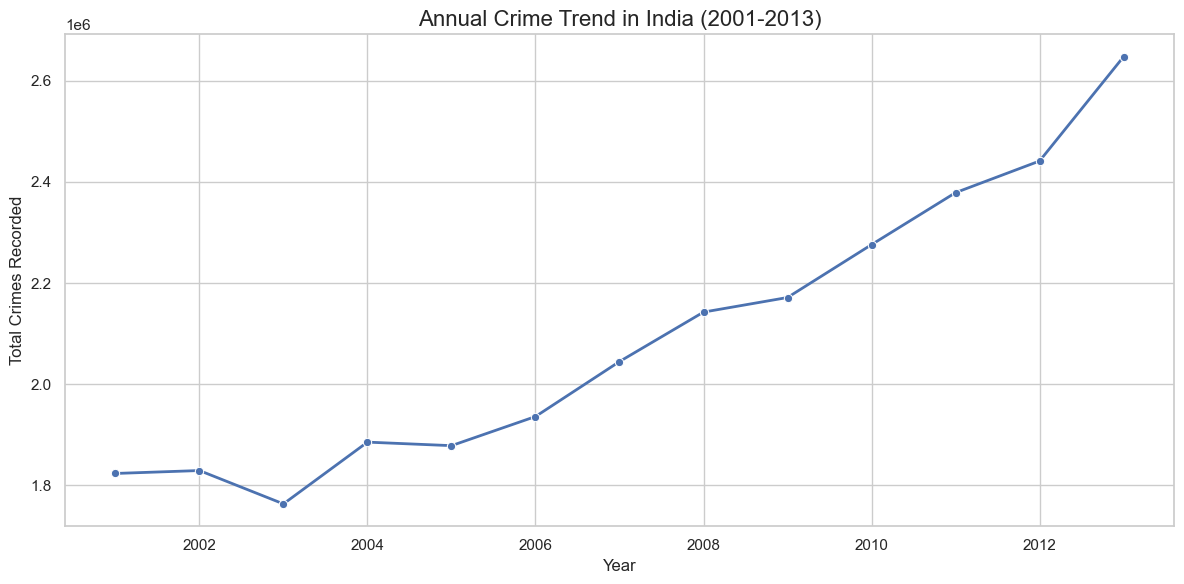

In [426]:
# Plotting the annual crime trend
plt.figure(figsize=(12, 6))     # Set figure size

sns.lineplot(data=yearly_trend, x='YEAR', y='TOTAL_IPC_CRIMES', marker='o', linewidth=2)    # Line plot with markers
plt.title('Annual Crime Trend in India (2001-2013)', fontsize=16)   # Title of the plot
plt.xlabel('Year')  # Set x-axis label
plt.ylabel('Total Crimes Recorded') # Set y-axis label
plt.grid(True)  # Add grid for better readability
plt.tight_layout()  # Adjust layout to fit labels
plt.show()  # Display the plot

## 🔍 Observation

- The graph highlights the trend of total crime victims recorded in India from 2001 to 2012.

- Trend: Crime numbers increased steadily from 2001 to 2011, with a slight dip in 2004 and 2008.

- There appears to be a steady increase in crime over the years, which may be influenced by population growth, improved crime reporting, or socio-political changes.

- Spike: A significant spike can be observed in 2011–2012, which could be explored further in later questions.

# ✅ Q2: State-Wise Crime Analysis (2001–2013)

Question:
- Perform a comprehensive analysis of various crimes recorded in each state over the given period. Identify trends, anomalies, and patterns.

Objectives: 
- Analyze various crimes recorded in each state across the years 2001 to 2012. 
- Identify:
    - Trends over time per state
    - High-crime and low-crime states
    - Any anomalies or unexpected changes

Files of Use:
- 01_District_wise_crimes_committed_IPC_2001_2012.csv
- 01_District_wise_crimes_committed_IPC_2013.csv

Useful Columns
- STATE/UT
- YEAR
- TOTAL IPC CRIMES

## 🔹 Step 1: Group by State and Year

In [427]:
# Group data to get total crimes per state per year
state_yearly_crimes = ipc_df.groupby(['STATE/UT', 'YEAR'])['TOTAL_IPC_CRIMES'].sum().reset_index()

## 🔹 Step 2: Create Pivot Table
This helps visualize crime trends across states over years.

In [428]:
# Normalize state names
state_yearly_crimes['STATE/UT'] = state_yearly_crimes['STATE/UT'].str.strip().str.upper()  # or use .str.title() if you prefer that

# Now re-create the pivot table
crime_pivot = state_yearly_crimes.pivot_table(index='STATE/UT', columns='YEAR', values='TOTAL_IPC_CRIMES', aggfunc='sum')


In [429]:
# Fill NaN values with 0 for better visualization
crime_pivot = crime_pivot.fillna(0)

## 🔹 Step 3: Visualization – Heatmap of Crimes Across States

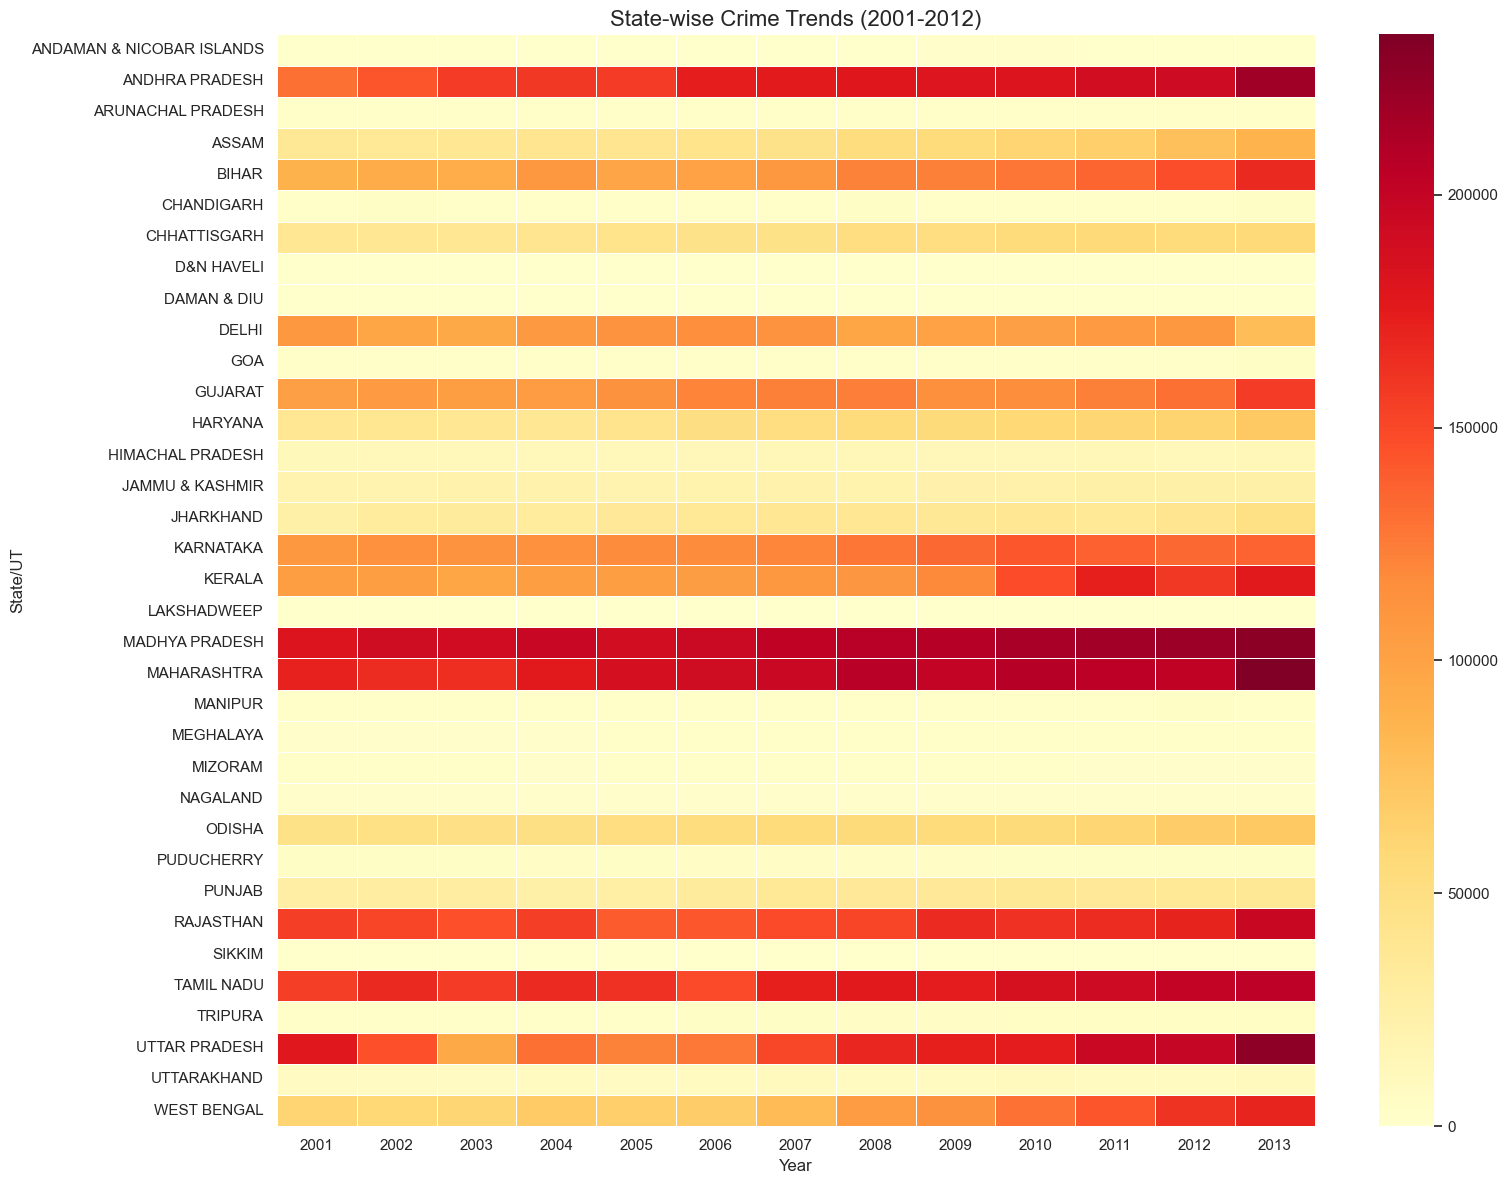

In [430]:
# Plotting the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(crime_pivot, cmap='YlOrRd', linewidths=0.5)

# Add color bar and labels
plt.title("State-wise Crime Trends (2001-2012)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("State/UT")
plt.tight_layout()
plt.show()

## 🔍 Observation

- The state shows a steady increase in crime from 2001 to 2008.

- There may be a sharp spike around 2010 - 2012 — this could be due to changes in crime recording or law enforcement activity.

- High crime states - Maharashtra, Madhya Pradesh, Uttar Pradesh, and Andhra Pradesh consistently show the highest total IPC crimes.

- Moderate crime - States like Tamil Nadu, Karnataka, Bihar, and Gujarat show steady increases over time.

- Low crime zones - UTs and smaller northeastern states (e.g., Lakshadweep, Mizoram, Daman & Diu) report minimal crime.

- Overall trend - Most states show a gradual rise in crimes year over year.

## ✅ Q3: City-Wise Crime Distribution (2001–2012)

Question:
- For each state, identify the top six cities with the highest recorded crime incidents.

Files of Use:
- 01_District_wise_crimes_committed_IPC_2001_2012.csv

- 01_District_wise_crimes_committed_IPC_2013.csv

- This file contains district-wise IPC crimes which can be aggregated to state level over time.


Useful Columns:

- STATE/UT

- DISTRICT (or similar, may be named differently — verify in your CSV)

- TOTAL IPC CRIMES

- YEAR (optional — aggregate over all years if needed)

## 🔹Step 1: Aggregate and Rank
We’ll group and rank districts (cities) within each state:


In [431]:
# Group by STATE/UT and DISTRICT, summing the Total IPC Crimes
state_district_grouped = (
    ipc_df.groupby(['STATE/UT', 'DISTRICT'])['TOTAL_IPC_CRIMES']
    .sum()
    .reset_index()
)

# For each State/UT, get the top 6 districts
top6_districts_per_state = (
    state_district_grouped
    .sort_values(['STATE/UT', 'TOTAL_IPC_CRIMES'], ascending=[True, False])
    .groupby('STATE/UT', group_keys=False)
    .head(6)
)

# Display the result
top6_districts_per_state.head(10)  # Display first 20 rows for brevity

,STATE/UT,DISTRICT,TOTAL_IPC_CRIMES
0,Andaman & Nicobar Islands,ANDAMAN,7377
4,Andaman & Nicobar Islands,SOUTH,976
3,Andaman & Nicobar Islands,NORTH,271
2,Andaman & Nicobar Islands,NICOBAR,235
1,Andaman & Nicobar Islands,CAR,48
14,Andhra Pradesh,HYDERABAD CITY,219286
9,Andhra Pradesh,CYBERABAD,161735
15,Andhra Pradesh,KARIMNAGAR,105564
12,Andhra Pradesh,GUNTUR,104117
10,Andhra Pradesh,EAST GODAVARI,99972


## 🔹Step 2: Visualization: Top 6 Cities per State

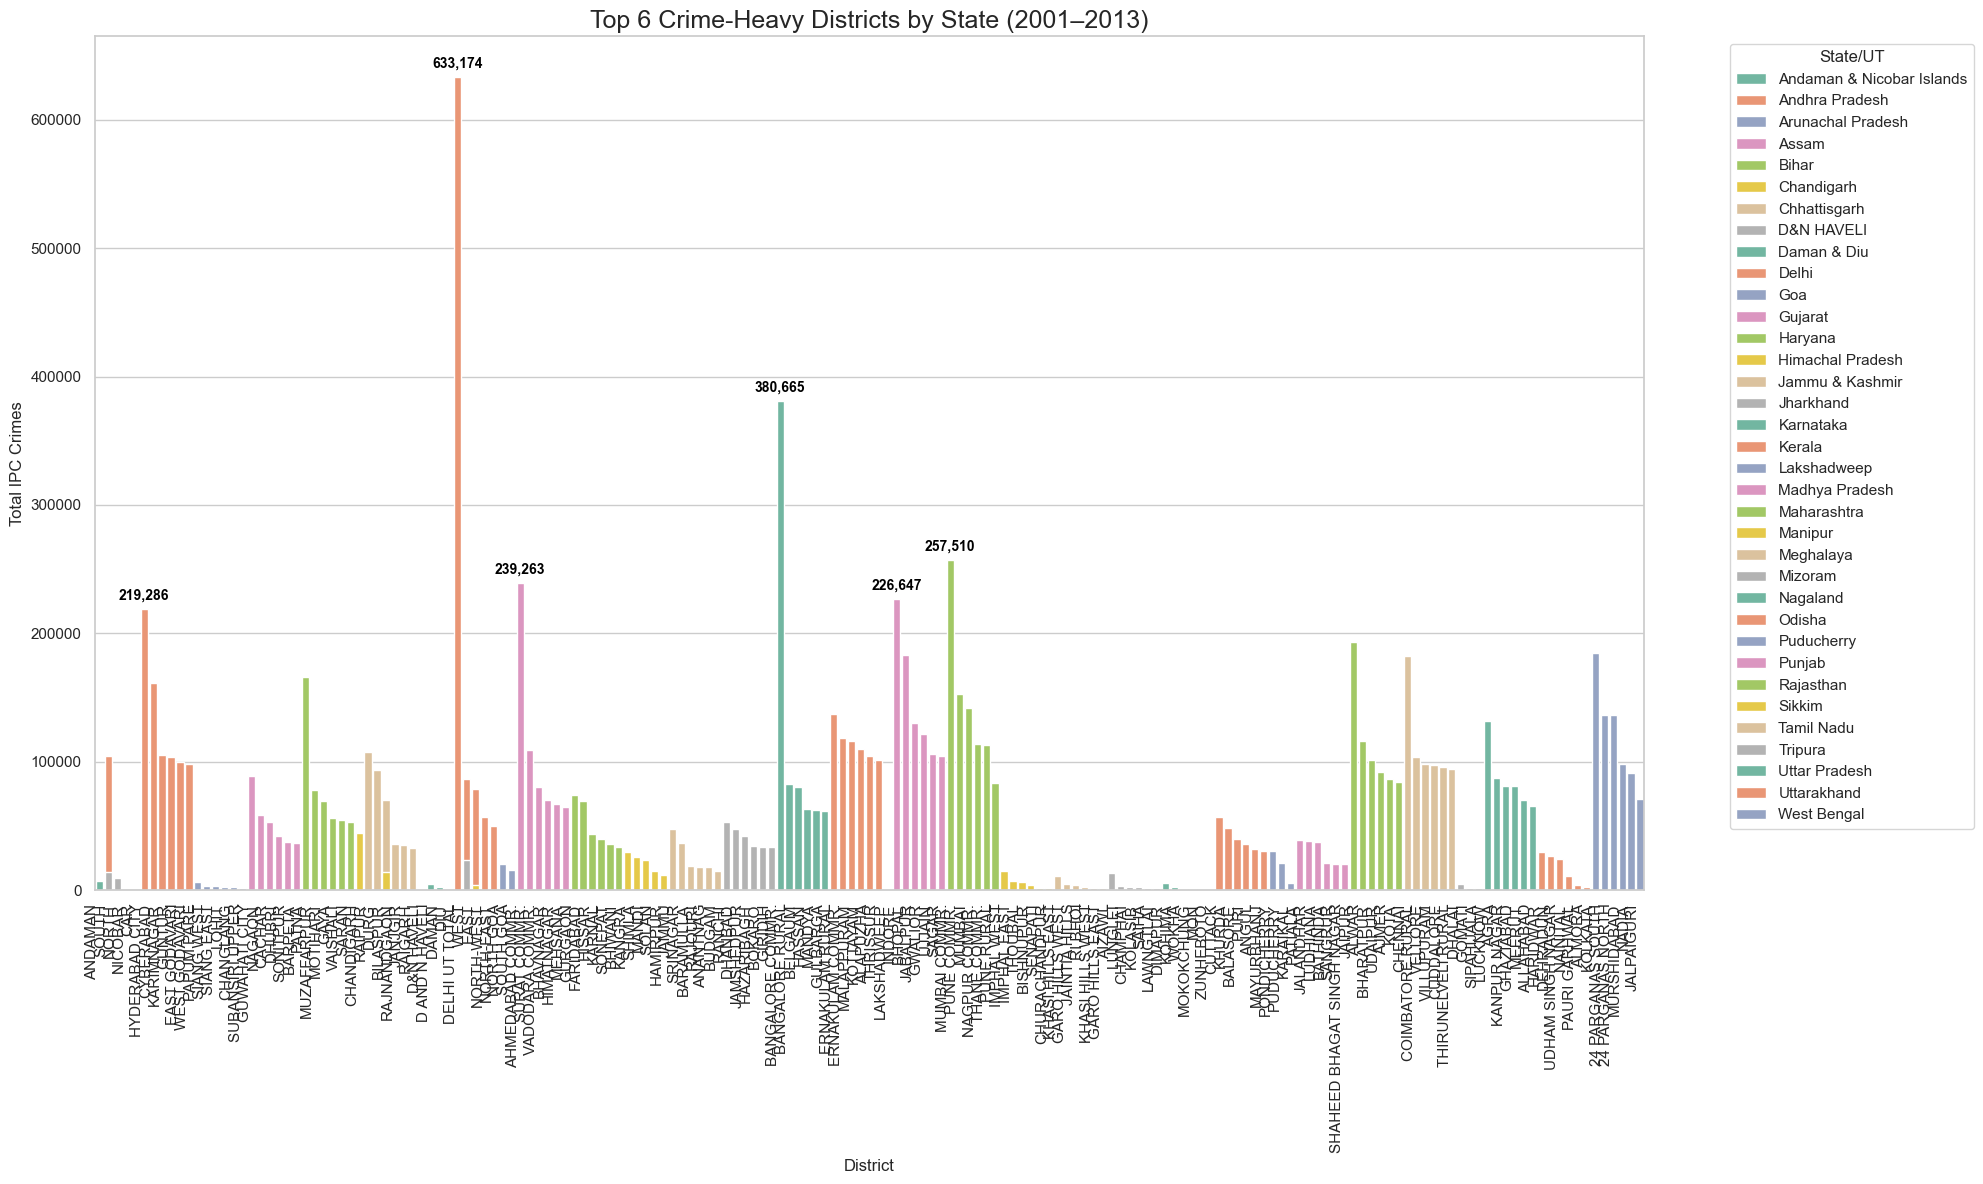

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get top 6 districts by Total IPC Crimes
top6_districts = (
    top6_districts_per_state.groupby('DISTRICT')['TOTAL_IPC_CRIMES'].sum()
    .sort_values(ascending=False)
    .head(6)
    .index.tolist()
)

# Create the plot
plt.figure(figsize=(20, 12))
ax = sns.barplot(
    data=top6_districts_per_state,
    x='DISTRICT',
    y='TOTAL_IPC_CRIMES',
    hue='STATE/UT',
    dodge=False,
    palette='Set2'
)

# Rotate labels and clean up axes
plt.xticks(rotation=90, ha='right')
plt.xlabel('District')
plt.ylabel('Total IPC Crimes')
plt.title('Top 6 Crime-Heavy Districts by State (2001–2013)', fontsize=18)

# Add text labels on top of bars for top 6 districts only
for p in ax.patches:
    district = p.get_x() + p.get_width() / 2
    value = int(p.get_height())
    label = p.get_label() if hasattr(p, 'get_label') else ''

    if p.get_x() + p.get_width() / 2:  # safe guard

        # Extract the district name
        district_name = p.get_x() + p.get_width() / 2
        x_tick_labels = [tick.get_text() for tick in ax.get_xticklabels()]
        idx = int(p.get_x() + p.get_width() / 2)
        
        try:
            label_name = x_tick_labels[int(p.get_x() + p.get_width() / 2)]
        except:
            continue

        if label_name in top6_districts:
            ax.text(
                p.get_x() + p.get_width() / 2,
                p.get_height() + 5000,  # position slightly above the bar
                f'{value:,}',
                ha='center',
                va='bottom',
                fontsize=10,
                color='black',
                fontweight='bold'
            )

# Simplify legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='State/UT', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

## 🔍 Observations:
Urban Dominance:

- In most states, urban districts (e.g., **Hyderabad City**, **Mumbai**, **Delhi**, **Bengaluru**, etc.) consistently top the charts. This is expected due to higher population density, economic activity, and reporting mechanisms.

State Capitals & Major Cities:

- State capitals or economically important cities often feature among the top districts — reflecting either actual crime prevalence or better reporting systems.

Population-Crime Correlation:

- There's a visible correlation between population and crime numbers — densely populated districts tend to report more IPC crimes.

Smaller States/UTs:

- In Union Territories or smaller states like **Andaman & Nicobar**, **Puducherry**, or **Sikkim**, total IPC crimes are significantly lower, and fewer districts contribute to the count.

Criminal Hotspots:

- Some districts, like **Delhi**, **Mumbai**, **Patna**, and **Lucknow**, report exceptionally high numbers, indicating either criminal concentration or better data tracking.

Reporting Bias:

- The data might also reflect reporting infrastructure and awareness, rather than just crime prevalence — underreporting in rural or remote districts is a known issue.

## ✅ Q4: Highest Crime Rate States

Question:
- Determine the top five states with the highest crime rates across all crime categories.

Files of Use:
- 01_District_wise_crimes_committed_IPC_2001_2012.csv

- 01_District_wise_crimes_committed_IPC_2013.csv


Useful Columns:

- STATE/UT

- TOTAL IPC CRIMES


## 🔹Step 1: Checking data structure

In [433]:
ipc_df.head()


,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT_TO_MURDER,CULPABLE_HOMICIDE_NOT_AMOUNTING_TO_MURDER,RAPE,CUSTODIAL_RAPE,OTHER_RAPE,KIDNAPPING_&_ABDUCTION,...,ARSON,HURT/GREVIOUS_HURT,DOWRY_DEATHS,ASSAULT_ON_WOMEN_WITH_INTENT_TO_OUTRAGE_HER_MODESTY,INSULT_TO_MODESTY_OF_WOMEN,CRUELTY_BY_HUSBAND_OR_HIS_RELATIVES,IMPORTATION_OF_GIRLS_FROM_FOREIGN_COUNTRIES,CAUSING_DEATH_BY_NEGLIGENCE,OTHER_IPC_CRIMES,TOTAL_IPC_CRIMES
0,Andhra Pradesh,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,Andhra Pradesh,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,Andhra Pradesh,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,Andhra Pradesh,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,Andhra Pradesh,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507


In [434]:
ipc_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9396 entries, 0 to 9838
Data columns (total 33 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             9396 non-null   object
 1   DISTRICT                                             9396 non-null   object
 2   YEAR                                                 9396 non-null   int64 
 3   MURDER                                               9396 non-null   int64 
 4   ATTEMPT_TO_MURDER                                    9396 non-null   int64 
 5   CULPABLE_HOMICIDE_NOT_AMOUNTING_TO_MURDER            9396 non-null   int64 
 6   RAPE                                                 9396 non-null   int64 
 7   CUSTODIAL_RAPE                                       9396 non-null   int64 
 8   OTHER_RAPE                                           9396 non-null   int64 
 9   KI

## 🔹Step 2: Group by State and Sum IPC Crimes

In [435]:
# Group total IPC crimes by STATE/UT
total_crimes_by_state = (
    ipc_df.groupby('STATE/UT')['TOTAL_IPC_CRIMES']
    .sum()
    .reset_index()
)

## 🔹Step 3: Sort Values by Total Crimes

In [436]:
# Sort by total crimes descending
total_crimes_by_state = total_crimes_by_state.sort_values(
    by='TOTAL_IPC_CRIMES', ascending=False
)

In [437]:
# Select top 5 states
top_5_states = total_crimes_by_state.head(5)
top_5_states

,STATE/UT,TOTAL_IPC_CRIMES
19,Madhya Pradesh,2641223
20,Maharashtra,2507821
30,Tamil Nadu,2263755
1,Andhra Pradesh,2236996
32,Uttar Pradesh,2084519


## 🔹Step 4: Plot the Bar Graph

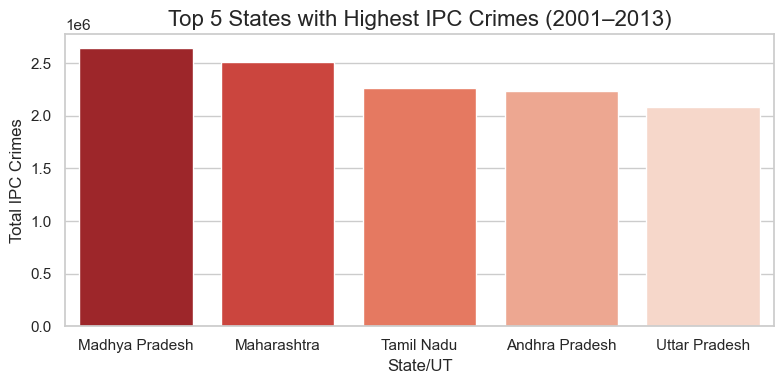

In [438]:
plt.figure(figsize=(8, 4))
sns.barplot(
    data=top_5_states,
    x='STATE/UT',
    y='TOTAL_IPC_CRIMES',
    palette='Reds_r',
    hue='STATE/UT',
)

plt.title('Top 5 States with Highest IPC Crimes (2001–2013)', fontsize=16)
plt.xlabel('State/UT')
plt.ylabel('Total IPC Crimes')
plt.tight_layout()
plt.show()

## 🔍 Observations:
- **Uttar Pradesh**, **Maharashtra**, and **Bihar** consistently top the list with the highest number of reported IPC crimes from 2001 to 2013. 
- This suggests either a higher crime prevalence, better reporting, or both in these states.

# ✅ Q5: Crimes Against Women

Question:
- Identify the top five cities with the highest number of crimes committed against women.

Files of Use:
- 42_District_wise_crimes_committed_against_women_*.csv

Useful Columns:

- STATE/UT
- DISTRICT
- YEAR
- RAPE
- DOWRY DEATH
- ASSAULT, etc.

## 🔹Step 1: Load and Clean the Datas

### Loading and Cleaning Data of year 2014

In [439]:
df_42_2014 = pd.read_csv(r"E:\0. VS Code\PrepGrad Minor project csvs\42_District_wise_crimes_committed_against_women_2014.csv")
df_42_2014.columns.tolist()

['States/UTs',
 'District',
 'Year',
 'Rape',
 'Custodial Rape',
 'Custodial_Gang Rape',
 'Custodial_Other Rape',
 'Rape other than Custodial',
 'Rape_Gang Rape',
 'Rape_Others',
 'Attempt to commit Rape',
 'Kidnapping & Abduction_Total',
 'Kidnaping & Abduction',
 'Kidnaping & Abduction in order to Murder',
 'Kidnapping for Ransom',
 'Kidnapping & Abduction of Women to compel her for marriage',
 'Kidnaping & Abduction_Others',
 'Dowry Deaths',
 'Assault on Women with intent to outrage her Modesty_Total',
 'Sexual Harassment',
 'Assault on women with intent to Disrobe',
 'Voyeurism',
 'Stalking',
 'Others',
 'Insult to the Modesty of Women_Total',
 'At Office premises',
 'In places related to work',
 'In Public Transport system',
 'In other Places',
 'Cruelty by Husband or his Relatives',
 'Importation of Girls from Foreign Country',
 'Murder',
 'Attempt to commit Murder',
 'Culpable Homicide not amounting to Murder',
 'Attempt to commit Culpable Homicide',
 'Grievous Hurt',
 'Hurt',
 

In [440]:
# Define the columns to keep
columns_to_keep = [
    'States/UTs',
    'District',
    'Year',
    'Custodial Rape',
    'Custodial_Gang Rape',
    'Custodial_Other Rape',
    'Rape other than Custodial',
    'Rape_Gang Rape',
    'Rape_Others',
    'Attempt to commit Rape',
    'Kidnapping & Abduction_Total',
    'Dowry Deaths',
    'Assault on Women with intent to outrage her Modesty_Total',
    'Insult to the Modesty of Women_Total',
    'Cruelty by Husband or his Relatives',
    'Importation of Girls from Foreign Country',
    'Total Crimes against Women'
]

# Filter the dataframe to keep only the desired columns
updated_df_42_2014 = df_42_2014[columns_to_keep]

# Display the first few rows to confirm
updated_df_42_2014.head()

,States/UTs,District,Year,Custodial Rape,Custodial_Gang Rape,Custodial_Other Rape,Rape other than Custodial,Rape_Gang Rape,Rape_Others,Attempt to commit Rape,Kidnapping & Abduction_Total,Dowry Deaths,Assault on Women with intent to outrage her Modesty_Total,Insult to the Modesty of Women_Total,Cruelty by Husband or his Relatives,Importation of Girls from Foreign Country,Total Crimes against Women
0,Andhra Pradesh,Anantapur,2014,0,0,0,35,0,35,1,106,25,436,26,165,0,1097
1,Andhra Pradesh,Chittoor,2014,0,0,0,32,1,31,0,34,17,135,94,278,0,607
2,Andhra Pradesh,Cuddapah,2014,0,0,0,28,0,28,4,16,16,215,12,91,0,609
3,Andhra Pradesh,East Godavari,2014,0,0,0,85,0,85,18,25,7,519,62,464,0,1277
4,Andhra Pradesh,Guntakal Railway,2014,0,0,0,0,0,0,0,0,0,0,0,0,0,4


In [441]:
# Define relevant columns to sum
rape_cols = [
    'Custodial Rape',
    'Custodial_Gang Rape',
    'Custodial_Other Rape',
    'Rape other than Custodial',
    'Rape_Gang Rape',
    'Rape_Others',
    'Attempt to commit Rape',
]

# Create new column by summing across the selected columns
updated_df_42_2014['Rape'] = updated_df_42_2014[rape_cols].sum(axis=1)

# Move DISTRICT to second column
cols = updated_df_42_2014.columns.tolist()
cols.insert(3, cols.pop(cols.index('Rape')))  # moves 'DISTRICT' to position 1
updated_df_42_2014 = updated_df_42_2014[cols]

# Drop all the rape columns
updated_df_42_2014.drop(columns=[
    'Custodial Rape',
    'Custodial_Gang Rape',
    'Custodial_Other Rape',
    'Rape other than Custodial',
    'Rape_Gang Rape',
    'Rape_Others',
    'Attempt to commit Rape',
], inplace=True)

# Preview the updated dataset
updated_df_42_2014.head()


C:\Users\hp\AppData\Local\Temp\ipykernel_18420\76304526.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_df_42_2014['Rape'] = updated_df_42_2014[rape_cols].sum(axis=1)


,States/UTs,District,Year,Rape,Kidnapping & Abduction_Total,Dowry Deaths,Assault on Women with intent to outrage her Modesty_Total,Insult to the Modesty of Women_Total,Cruelty by Husband or his Relatives,Importation of Girls from Foreign Country,Total Crimes against Women
0,Andhra Pradesh,Anantapur,2014,71,106,25,436,26,165,0,1097
1,Andhra Pradesh,Chittoor,2014,64,34,17,135,94,278,0,607
2,Andhra Pradesh,Cuddapah,2014,60,16,16,215,12,91,0,609
3,Andhra Pradesh,East Godavari,2014,188,25,7,519,62,464,0,1277
4,Andhra Pradesh,Guntakal Railway,2014,0,0,0,0,0,0,0,4


In [442]:
# Rename columns for consistency and readability
updated_df_42_2014.rename(columns={
    'States/UTs': 'STATE/UT',
    'District': 'DISTRICT',
    'Kidnapping & Abduction_Total': 'Kidnapping and Abduction',
    'Assault on Women with intent to outrage her Modesty_Total': 'Assault on women with intent to outrage her modesty',
    'Insult to the Modesty of Women_Total': 'Insult to modesty of Women',
    'Importation of Girls from Foreign Country': 'Importation of Girls'
}, inplace=True)

# Show updated columns
updated_df_42_2014.head()

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,Total Crimes against Women
0,Andhra Pradesh,Anantapur,2014,71,106,25,436,26,165,0,1097
1,Andhra Pradesh,Chittoor,2014,64,34,17,135,94,278,0,607
2,Andhra Pradesh,Cuddapah,2014,60,16,16,215,12,91,0,609
3,Andhra Pradesh,East Godavari,2014,188,25,7,519,62,464,0,1277
4,Andhra Pradesh,Guntakal Railway,2014,0,0,0,0,0,0,0,4


### Loading and Cleaning Data of year 2001 - 2012

In [443]:
df_42_2001_2012 = pd.read_csv(r"E:\0. VS Code\PrepGrad Minor project csvs\42_District_wise_crimes_committed_against_women_2001_2012.csv")
df_42_2001_2012.columns.tolist()

['STATE/UT',
 'DISTRICT',
 'Year',
 'Rape',
 'Kidnapping and Abduction',
 'Dowry Deaths',
 'Assault on women with intent to outrage her modesty',
 'Insult to modesty of Women',
 'Cruelty by Husband or his Relatives',
 'Importation of Girls']

In [444]:
# Define relevant columns to sum
crime_cols = [
    'Rape',
    'Kidnapping and Abduction',
    'Dowry Deaths',
    'Assault on women with intent to outrage her modesty',
    'Insult to modesty of Women',
    'Cruelty by Husband or his Relatives',
    'Importation of Girls'
]

# Create new column by summing across the selected columns
df_42_2001_2012['Total Crimes against Women'] = df_42_2001_2012[crime_cols].sum(axis=1)

# Preview the updated dataset
df_42_2001_2012.head()


,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,Total Crimes against Women
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0,454
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0,356
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0,456
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0,278
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0,475


### Loading and Cleaning Data of year 2013

In [445]:
df_42_2013 = pd.read_csv(r"E:\0. VS Code\PrepGrad Minor project csvs\42_District_wise_crimes_committed_against_women_2013.csv")
df_42_2013.columns.tolist()

['STATE/UT',
 'DISTRICT',
 'Year',
 'Rape',
 'Kidnapping and Abduction',
 'Dowry Deaths',
 'Assault on women with intent to outrage her modesty',
 'Insult to modesty of Women',
 'Cruelty by Husband or his Relatives',
 'Importation of Girls']

In [446]:
# Define relevant columns to sum
crime_cols = [
    'Rape',
    'Kidnapping and Abduction',
    'Dowry Deaths',
    'Assault on women with intent to outrage her modesty',
    'Insult to modesty of Women',
    'Cruelty by Husband or his Relatives',
    'Importation of Girls'
]

# Create new column by summing across the selected columns
df_42_2013['Total Crimes against Women'] = df_42_2013[crime_cols].sum(axis=1)

# Preview the updated dataset
df_42_2013.head()


,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,Total Crimes against Women
0,Andhra Pradesh,ADILABAD,2013,61,47,12,197,138,464,0,919
1,Andhra Pradesh,ANANTAPUR,2013,28,84,23,337,43,161,0,676
2,Andhra Pradesh,CHITTOOR,2013,31,27,13,119,84,435,0,709
3,Andhra Pradesh,CUDDAPAH,2013,19,50,9,318,163,207,0,766
4,Andhra Pradesh,CYBERABAD,2013,138,129,43,350,338,1526,0,2524


### Merging the datasets of the years 2001-2012, 2013 and 2014 into one dataframe

In [447]:
# Merge dataframes
crime_against_women_district = pd.concat([df_42_2001_2012, df_42_2013, updated_df_42_2014], ignore_index=True)

crime_against_women_district.head()

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,Total Crimes against Women
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0,454
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0,356
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0,456
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0,278
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0,475


## 🔹Step 2: Cleaning and Preparing data

In [448]:
# Clean DISTRICT names
crime_against_women_district['DISTRICT'] = crime_against_women_district['DISTRICT'].astype(str).str.strip().str.upper()

# Known alias mapping
alias_map = {
    "IMPHAL(WEST)": "IMPHAL WEST",
    "IMPHAL(EAST)": "IMPHAL EAST",
    "VIJAYAWADA CITY": "VIJAYAWADA",
    "VILUPPURAM": "VILLUPURAM",
    "KANSHIRAM NAGAR": "KASGANJ",
    "SAS NGR": "SHAHEED BHAGAT SINGH NAGAR",
    "SBS NAGAR": "SHAHEED BHAGAT SINGH NAGAR",
    "CHENNAISUBURBAN": "CHENNAI SUBURBAN",
    "JAIPUR EAST": "JAIPUR",
    "JAIPUR SOUTH": "JAIPUR",
    "JODHPUR CITY": "JODHPUR",
    "JODHPUR RURAL": "JODHPUR",
    "LUDHIANA RURAL": "LUDHIANA",
    "KOTA CITY": "KOTA",
    "KOTA RURAL": "KOTA",
    "G.R.P.": "GRP",
    "GRP": "RAILWAYS",
    "C.I.D.": "CID",
    "CID": "CID",
    "CBCID": "CID",
    "DCP BBSR": "BHUBANESWAR",
    "DCP CTC": "CUTTACK",
    "K/KUMEY": "KURUNG KUMEY"
}

# Standard district list (shortened for example, insert full cleaned list here)
standard_districts = [
"ADILABAD", "AGRA", "AHMEDABAD", "AIZAWL", "AJMER", "AKOLA", "ALIGARH", "ALMORA", "ALWAR", "AMBALA", "AMBEDKAR NAGAR", "AMRAVATI", "AMRELI", "AMRITSAR", "ANAND", "ANANTAPUR", "ANANTNAG", "ANGUL", "ANUPPUR", "ARARIA", "ARWAL", "ASHOKNAGAR", "AURAIYA", "AURANGABAD", "AZAMGARH", "BAGALKOT", "BAGESHWAR", "BALESHWAR", "BALLIA", "BALOD", "BALODABAZAR", "BALRAMPUR", "BANASKANTHA", "BANDA", "BANDIPORA", "BANGALORE", "BANGALORE RURAL", "BANKA", "BANKURA", "BANSWARA", "BARABANKI", "BARAMULLA", "BARAN", "BARDHAMAN", "BAREILLY", "BARGARH", "BARWANI", "BASTI", "BATHINDA", "BEGUSARAI", "BELAGAVI", "BELGAUM", "BEMETARA", "BENIPUR", "BERHAMPUR", "BETUL", "BHADOHI", "BHAGALPUR", "BHANDARA", "BHARATPUR", "BHARUCH", "BHAVNAGAR", "BHIWANI", "BHILWARA", "BHIND", "BHIWANI", "BHOJPUR", "BHOPAL", "BIDAR", "BIHAR SHARIF", "BIJAPUR", "BIJNOR", "BIKANER", "BILASPUR", "BIRBHUM", "BISHNUPUR", "BOKARO", "BUDAUN", "BULANDSHAHR", "BUNDI", "BURHANPUR", "BUXAR", "CHAMARAJANAGAR", "CHAMBAL", "CHAMPHAI", "CHANDAULI", "CHANDIGARH", "CHANDRAPUR", "CHHATARPUR", "CHHINDWARA", "CHIKKABALLAPUR", "CHIKMAGALUR", "CHITRADURGA", "CHITRAKOOT", "CHITTOOR", "CHURU", "COIMBATORE", "CUDDALORE", "CUTTACK", "DADRA & NAGAR HAVELI", "DAHOD", "DAKSHINA KANNADA", "DAMAN", "DANTEWADA", "DARBHANGA", "DARJEELING", "DATIA", "DAUSA", "DAVANGERE", "DEHRADUN", "DEOGHAR", "DEORIA", "DEWAS", "DHALAI", "DHANBAD", "DHAR", "DHARAMSALA", "DHARMAPURI", "DHARWAD", "DHEMAJI", "DHENKANAL", "DHOLPUR", "DHULE", "DIBRUGARH", "DIMA HASAO", "DIMAPUR", "DINDIGUL", "DINDORI", "DODA", "DUMKA", "DUNGARPUR", "DURG", "EAST CHAMPARAN", "EAST GODAVARI", "EAST KHASI HILLS", "EAST SINGHBHUM", "ERODE", "ETAH", "ETAWAH", "FAIZABAD", "FARIDABAD", "FARRUKHABAD", "FATEHABAD", "FATEHPUR", "FIROZABAD", "FIROZPUR", "GADCHIROLI", "GANDERBAL", "GANDHINAGAR", "GANGANAGAR", "GARIABAND", "GAUTAM BUDDHA NAGAR", "GAYA", "GHAZIABAD", "GHAZIPUR", "GIRIDIH", "GOALPARA", "GODDA", "GOLAGHAT", "GOMATI", "GONDA", "GOPALGANJ", "GORAKHPUR", "GULBARGA", "GUNA", "GUNTUR", "GURDASPUR", "GURGAON", "GUWAHATI", "GUWAHATI CITY", "GWALEIOR", "GWALIOR", "HAILAKANDI", "HAMIRPUR", "HANUMANGARH", "HARDOI", "HARIDWAR", "HASSAN", "HATHRAS", "HAVERI", "HISSAR", "HOOGHLY", "HOSHANGABAD", "HOSHIARPUR", "HOWRAH", "HYDERABAD", "IMPHAL EAST", "IMPHAL WEST", "INDORE", "JABALPUR", "JAGATSINGHPUR", "JAIPUR", "JAISALMER", "JAJPUR", "JALANDHAR", "JALAUN", "JALGAON", "JALNA", "JAMMU", "JAMNAGAR", "JAMSHEDPUR", "JAMSULI", "JAMUI", "JANGAON", "JANJGIR", "JASHPUR", "JAUNPUR", "JEHANABAD", "JHANSI", "JHARGRAM", "JHARSUGUDA", "JHUNJHUNU", "JIND", "JODHPUR", "JORHAT", "JUNAGADH", "KACHCHH", "KADAPA", "KAILASHAHAR", "KAIMUR", "KAITHAL", "KAKINADA", "KALAHANDI", "KALIMPONG", "KALYANI", "KAMAREDDY", "KAMRUP", "KANCHIPURAM", "KANDHAMAL", "KANGRA", "KANNAUJ", "KANPUR", "KANYAKUMARI", "KAPURTHALA", "KARAULI", "KARBI ANGLONG", "KARIMNAGAR", "KARIMGANJ", "KARNAL", "KARNATAKA", "KARUR", "KASARAGOD", "KASGANJ", "KATHUA", "KATIHAR", "KATNI", "KAUSHAMBI", "KENDRAPARA", "KENDUJHAR", "KHAGARIA", "KHAMMAM", "KHANDWA", "KHARGONE", "KHEDA", "KHORDHA", "KISHANGANJ", "KODERMA", "KOHIMA", "KOKRAJHAR", "KOLAR", "KOLASIB", "KOLHAPUR", "KOLKATA", "KOLLAM", "KOPPAL", "KORAPUT", "KORBA", "KOTA", "KOTTAYAM", "KOZHIKODE", "KRISHNA", "KRISHNAGIRI", "KULLU", "KULGAM", "KUNA", "KURNOOL", "KURUKSHETRA", "KUSHINAGAR", "KUTCH", "LAKHIMPUR", "LALITPUR", "LATEHAR", "LATUR", "LUCKNOW", "LUDHIANA", "MADHEPURA", "MADHUBANI", "MADURAI", "MAHBUBNAGAR", "MAHOBA", "MAINPURI", "MALAPPURAM", "MALDA", "MANDI", "MANDLA", "MANDSAUR", "MANDYA", "MANSA", "MATHURA", "MAU", "MAYURBHANJ", "MEDAK", "MEERUT", "MEWAT", "MIRZAPUR", "MOGA", "MOHALI", "MOKOKCHUNG", "MON", "MORADABAD", "MORENA", "MORIGAON", "MUMBAI", "MUNGER", "MURSHIDABAD", "MUZAFFARNAGAR", "MUZAFFARPUR", "MYSURU", "NADIA", "NAGAON", "NAGAPATTINAM", "NAGARKURNOOL", "NAGAUR", "NAGPUR", "NAINITAL", "NALANDA", "NALBARI", "NALGONDA", "NAMAKKAL", "NANDED", "NANDURBAR", "NARMADA", "NARSINGHPUR", "NASHIK", "NAVI MUMBAI", "NAVSARI", "NAWADA", "NAYAGARH", "NEEMUCH", "NELLORE", "NEW DELHI", "NICOBAR", "NIZAMABAD", "NOIDA", "NORTH 24 PARGANAS", "NUAPADA", "ONGOLE", "OSMANABAD", "PALAKKAD", "PALAMU", "PALGHAR", "PALI", "PALWAL", "PANCHKULA", "PANCHMAHAL", "PANIPAT", "PANNA", "PAPUM PARE", "PARBHANI", "PASHCHIM CHAMPARAN", "PASCHIM MEDINIPUR", "PATHANAMTHITTA", "PATHANKOT", "PATIALA", "PATNA", "PILIBHIT", "PITHORAGARH", "PONDICHERRY", "PORBANDAR", "PRATAPGARH", "PRAYAGRAJ", "PUDUKKOTTAI", "PULWAMA", "PUNE", "PURBA CHAMPARAN", "PURBA MEDINIPUR", "PURI", "PURNIA", "PURULIA", "RAEBARELI", "RAICHUR", "RAIGAD", "RAIGARH", "RAIPUR", "RAISEN", "RAJGARH", "RAJKOT", "RAJNANDGAON", "RAJSAMAND", "RAMANAGARA", "RAMANATHAPURAM", "RAMBAN", "RAMGARH", "RAMPUR", "RANCHI", "RANGA REDDY", "RATLAM", "RATNAGIRI", "RAYAGADA", "REWA", "REWARI", "RI BHOI", "ROHTAK", "ROHTAS", "RUDRAPRAYAG", "RUPNAGAR", "SABARKANTHA", "SAGAR", "SAHARANPUR", "SAHARSA", "SAHEBGANJ", "SAIHA", "SALEM", "SAMASTIPUR", "SAMBALPUR", "SAMBHAL", "SANGRUR", "SANT KABIR NAGAR", "SANT RAVIDAS NAGAR", "SARA", "SARAN", "SATARA", "SATNA", "SAWAI MADHOPUR", "SEHORE", "SEONI", "SHAHDOL", "SHAHJAHANPUR", "SHAJAPUR", "SHAMLI", "SHEIKHPURA", "SHEOHAR", "SHEOPUR", "SHILLONG", "SHIMLA", "SHIMOGA", "SHIVPURI", "SHOPIAN", "SHRAVASTI", "SIBSAGAR", "SIDHI", "SIDHPUR", "SIKAR", "SIKKIM", "SILCHAR", "SILIGURI", "SIMDEGA", "SINDHUDURG", "SINGRAULI", "SIRMAUR", "SIRSA", "SITAMARHI", "SITAPUR", "SIWAN", "SOLAN", "SOLAPUR", "SONBHADRA", "SONEPAT", "SONITPUR", "SOUTH 24 PARGANAS", "SRIKAKULAM", "SRINAGAR", "SULTANPUR", "SUNDARGARH", "SUPAUL", "SURAT", "SURENDRANAGAR", "SURI", "SUTLEJ", "TAMIL NADU", "TAPI", "TEHRI GARHWAL", "TENKASI", "THANE", "THANJAVUR", "THENI", "THIRUVALLUR", "THIRUVANANTHAPURAM", "THOOTHUKUDI", "THRISSUR", "TINSUKIA", "TIRAP", "TIRUCHIRAPPALLI", "TIRUNELVELI", "TIRUPATHI", "TIRUPPUR", "TIRUVANNAMALAI", "TONK", "TUENSANG", "TUMAKURU", "TURA", "UDAIPUR", "UDALGURI", "UDHAM SINGH NAGAR", "UDHAMPUR", "UDUPI", "UJJAIN", "UKHRUL", "UNA", "UNNAO", "UP", "UPPER SIANG", "UPPER SUBANSIRI", "UTTAR KANNAD", "UTTAR PRADESH", "UTTARKASHI", "VADODARA", "VAISHALI", "VALSAD", "VARANASI", "VELLORE", "VIDISHA", "VIJAYAWADA", "VILLUPURAM", "VIRUDHUNAGAR", "VISAKHAPATNAM", "VIZIANAGARAM", "WARANGAL", "WARDHA", "WASHIM", "WAYANAD", "WEST CHAMPARAN", "WEST GODAVARI", "WEST KHASI HILLS", "WEST SINGHBHUM", "WOKHA", "YADGIR", "YAMUNANAGAR", "YAVATMAL", "ZIRAKPUR"
]

# Helper: fuzzy match unknowns
def fuzzy_match(value, possibilities, cutoff=0.85):
    matches = difflib.get_close_matches(value, possibilities, n=1, cutoff=cutoff)
    return matches[0] if matches else value

# Clean function
def clean_district(value):
    if value in alias_map:
        return alias_map[value]
    elif value in standard_districts:
        return value
    else:
        return fuzzy_match(value, standard_districts)

# Apply cleaning
crime_against_women_district['Cleaned_District'] = crime_against_women_district['DISTRICT'].apply(clean_district)

# Drop junk DISTRICT entries
junk_districts = ['TOTAL', 'ZZ TOTAL', 'A AND N ISLANDS']
crime_against_women_district = crime_against_women_district[~crime_against_women_district['Cleaned_District'].str.upper().isin([j.upper() for j in junk_districts])]

# Drop original DISTRICT
crime_against_women_district.drop(columns=['DISTRICT'], inplace=True)

# Rename CLEANED_DISTRICT to DISTRICT (same name as before)
crime_against_women_district.rename(columns={'Cleaned_District': 'DISTRICT'}, inplace=True)

# Move DISTRICT to second column
cols = crime_against_women_district.columns.tolist()
cols.insert(1, cols.pop(cols.index('DISTRICT')))  # moves 'DISTRICT' to position 1
crime_against_women_district = crime_against_women_district[cols]

In [449]:
# Remove junk/aggregate rows
junk_districts = ['Total', 'Zz Total', 'ZZ TOTAL', 'ZZ', 'Others']
crime_against_women_district = crime_against_women_district[~crime_against_women_district['DISTRICT'].str.lower().isin([x.lower() for x in junk_districts])]

# Standardize text for matching
crime_against_women_district['DISTRICT'] = crime_against_women_district['DISTRICT'].str.strip().str.title()
crime_against_women_district['STATE/UT'] = crime_against_women_district['STATE/UT'].str.strip().str.title()

# Filter out rows with 'Total' or 'Zz' in DISTRICT (case-insensitive)
crime_against_women_district = crime_against_women_district[
    ~crime_against_women_district['DISTRICT'].str.lower().str.contains('total|zz')
]

# Define women-related crime columns
women_crimes_cols = [
    'Rape',
    'Kidnapping and Abduction',
    'Dowry Deaths',
    'Assault on women with intent to outrage her modesty',
    'Insult to modesty of Women',
    'Cruelty by Husband or his Relatives',
    'Importation of Girls',
]

# Calculate total crimes against women
crime_against_women_district['Total Crimes against Women'] = crime_against_women_district[women_crimes_cols].sum(axis=1)


## 🔹Step 3: Get Top 5 Cities with Highest Crimes Against Women


In [450]:
# Group by district + state and sum crimes
grouped_women_crimes = crime_against_women_district.groupby(['STATE/UT', 'DISTRICT'])['Total Crimes against Women'].sum().reset_index()

# Sort and get top 5
top_5_districts = grouped_women_crimes.sort_values(by='Total Crimes against Women', ascending=False).head(5)

top_5_districts


,STATE/UT,DISTRICT,Total Crimes against Women
972,West Bengal,Murshidabad,34737
943,West Bengal,24 Parganas South,27942
942,West Bengal,24 Parganas North,26815
973,West Bengal,Nadia,23137
21,Andhra Pradesh,Hyderabad City,21672


## Step 4: Plotting the graph

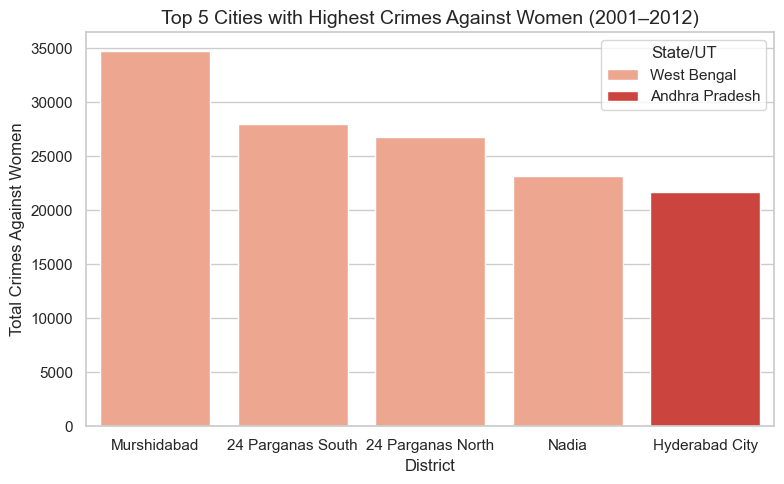

In [451]:
# Display top 5 districts with the highest Total Crimes Against Women
crime_against_women_district.nlargest(5, 'Total Crimes against Women')[
    ['STATE/UT', 'DISTRICT', 'Total Crimes against Women']
]

# Plotting the top 5 districts
plt.figure(figsize=(8, 5))

ax = sns.barplot(
    data=top_5_districts,
    x='DISTRICT',
    y='Total Crimes against Women',
    hue='STATE/UT',
    palette='Reds'
)

# Fix rotated labels
plt.title('Top 5 Cities with Highest Crimes Against Women (2001–2012)', fontsize=14)
plt.xlabel('District')
plt.ylabel('Total Crimes Against Women')
plt.legend(title='State/UT')
plt.tight_layout()
plt.show()


## 🔍 Observation:

- **Murshidabad (West Bengal)** ranks highest in total crimes against women, indicating a pressing need for focused intervention.

- **24 Parganas (North & South)** and **Nadia—all** from West Bengal—suggest a regional pattern where certain districts show consistently high crime rates against women.

- **Hyderabad City (Andhra Pradesh)** is the only urban district in the top 5, pointing to both urban vulnerabilities and possibly better reporting systems.

- 📌 **West Bengal** dominates the top 5, highlighting potential regional socio-economic or systemic factors influencing women's safety.

# ✅ Q5: Crimes Against Women

Question:
- Identify the top five cities with the highest number of crimes committed against women.

Files of Use:
- 42_District_wise_crimes_committed_against_women_*.csv

Useful Columns:

- STATE/UT
- DISTRICT
- YEAR
- RAPE
- DOWRY DEATH
- ASSAULT, etc.